In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

LABELS = ['square', 'circle', 'cyan', 'red', 'yellow', 'green']

def gen_dataset(num_samples):
    
    colors = [(0, 192, 192),
         (255, 0, 0),
         (255, 255, 0), 
         (0, 255, 0)
         ]
    num_shapes = 2
    num_colors = len(colors)
    
    dataset = []
    labels = []
    for i in range(num_samples):
        im = Image.new('RGB', (28, 28), (128, 128, 128))
        draw = ImageDraw.Draw(im)

        # randomly draw a color
        color_id = np.random.randint(0, num_colors)
        
        # randomly select a shape (either square or circle)
        shape_id = np.random.randint(0, num_shapes)
        if shape_id == 0:
            draw.rectangle((5, 5, 22, 22), fill=colors[color_id])
        elif shape_id == 1:
            draw.ellipse((5, 5, 22, 22), fill=colors[color_id])

        label = np.zeros(num_shapes + num_colors)  
        label[0:num_shapes][shape_id] = 1.
        label[num_shapes:][color_id] = 1.
        labels.append(label)    
            
        im_np = np.array(im)
        dataset.append(im_np)
    
    return np.array(dataset), np.array(labels)

In [2]:
num_train_samples = 10000
num_val_samples = 1000

train_data, train_labels = gen_dataset(num_train_samples)
val_data, val_labels = gen_dataset(num_val_samples)

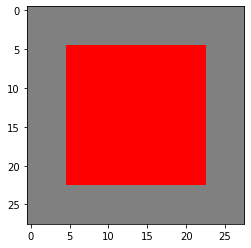

[1. 0. 0. 1. 0. 0.]
[1. 0. 1. 0. 0. 0.]
[0. 1. 1. 0. 0. 0.]


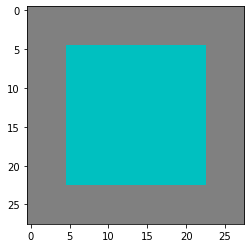

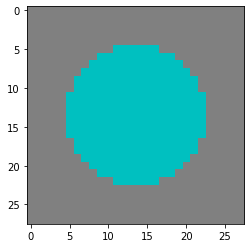

In [6]:
plt.figure()
plt.imshow(train_data[0])
plt.show()
print(train_labels[0])

plt.figure()
plt.imshow(train_data[2])
plt.show()
print(train_labels[2])

plt.figure()
plt.imshow(train_data[100])
plt.show()
print(train_labels[100])

In [50]:
np.save("data/train_toydata.npy", train_data)
np.save("data/val_toydata.npy", val_data)
np.save("data/train_toydata_labels.npy", train_labels)
np.save("data/val_toydata_labels.npy", val_labels)